In [1]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/Python/ORG01-01082021-31072022.csv') #reading the csv file

In [3]:
df.duplicated().sum()

1

In [4]:
df.duplicated().sum()

1

In [5]:
df2 = df.copy()

In [6]:
unique_cols= ['BookingStatus','IsLeadAttendee','EventType' ]

In [7]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
for i in unique_cols:
  df2[i] = encode.fit_transform(df2[i])
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,05/03/2021 16:27,219
1,Queer Homemaking I,22/10/2021 15:00,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,08/03/2021 17:02,219
2,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,10/03/2021 16:44,219
3,Queer Homemaking I,22/10/2021 15:00,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,16/03/2021 17:33,219
4,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,16/03/2021 17:35,219


In [8]:
import datetime as dt
# df2.set_index('StartDate',inplace=True)

In [9]:
# df3 = df2.copy().reset_index()
df2['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df['StatusCreatedDate'])

In [10]:
df2['days_to_event'] = df2['time_to_event']/ np.timedelta64(1, 'D')

In [11]:
df2.drop(df2[df2['days_to_event'] < 0].index, inplace = True)

In [12]:
df2 = df2.sort_values(by='StatusCreatedDate') 

In [13]:
df2.set_index('StatusCreatedDate',inplace=True)

In [42]:
df2['StatusCreatedDate'] = pd.to_datetime(df2.index, dayfirst=True)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61436 entries, 01/01/2022 02:28 to 31/12/2021 23:07
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          61436 non-null  object         
 1   StartDate          61436 non-null  object         
 2   EventType          61436 non-null  int64          
 3   BookingReference   61436 non-null  object         
 4   AttendeeReference  61436 non-null  object         
 5   GroupSize          61436 non-null  int64          
 6   IsLeadAttendee     61436 non-null  int64          
 7   AttendeeGrossCost  61436 non-null  float64        
 8   EventId            61436 non-null  int64          
 9   BookingStatus      61436 non-null  int64          
 10  AttendeeType       61436 non-null  object         
 11  TicketType         61436 non-null  object         
 12  ClientId           61436 non-null  int64          
 13  time_to_event      61436 

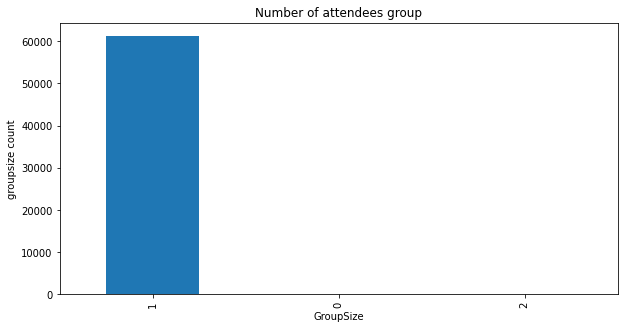

In [14]:
df2.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

In [15]:
# sns.countplot(x='EventName', data=df);
# plt.xticks(rotation=90);

In [16]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['GroupSize'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbfb9d83ee0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fbfd7842af0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# # Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['cum_booking'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [ ]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['GroupSize'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [29]:
df2.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event
StatusCreatedDate,,,,,,,,,,,,,,,
01/01/2022 02:28,Gaelic Vegetarian and Veganism & Colonial Resi...,10/02/2022 17:30,8,B1042459,A1111227,1,1,0.0,25425,0,Attendee,Standard,219,274 days 15:02:00,274.626389
01/01/2022 04:25,Lightning talks: new food researchers,06/01/2022 14:00,8,B1042460,A1111228,1,1,0.0,25422,0,Attendee,Standard,219,151 days 09:35:00,151.399306
01/01/2022 08:49,Lightning talks: new food researchers,06/01/2022 14:00,8,B1042461,A1111229,1,1,0.0,25422,0,Attendee,Standard,219,151 days 05:11:00,151.215972
01/01/2022 09:27,Gaelic Vegetarian and Veganism & Colonial Resi...,10/02/2022 17:30,8,B1042462,A1111230,1,1,0.0,25425,0,Attendee,Standard,219,274 days 08:03:00,274.335417
01/01/2022 13:23,Study at the Warburg: Open Day. Spring 2022,03/02/2022 13:45,5,B1042464,A1111232,1,1,0.0,25302,0,CIV Taught Programmes,CIV Taught Programmes,219,60 days 00:22:00,60.015278


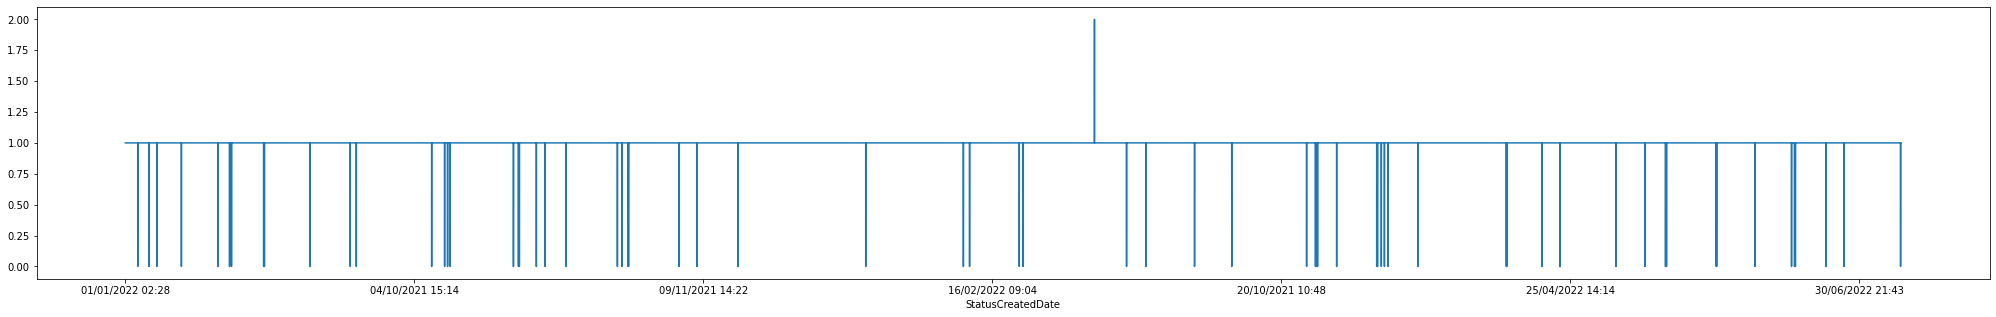

In [30]:
plt.figure(figsize=(35,5))
df2['GroupSize'].plot()

In [31]:
df2['cum_booking'] = df2['GroupSize'].cumsum(axis=0)

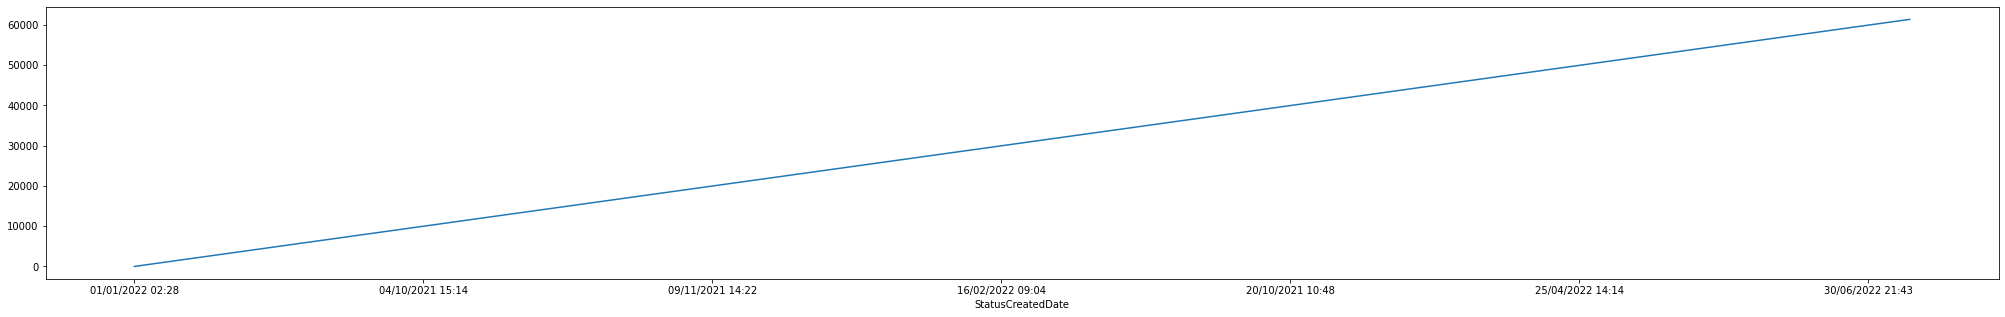

In [32]:
plt.figure(figsize=(35,5))
df2['cum_booking'].plot()

In [17]:
dfs = df2.copy()

In [18]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs['GroupSize'], test_size=.3, shuffle=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:                43005
Model:                 ARIMA(2, 0, 1)   Log Likelihood               85659.726
Date:                Sun, 19 Feb 2023   AIC                        -171309.452
Time:                        23:42:17   BIC                        -171266.106
Sample:                             0   HQIC                       -171295.778
                              - 43005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9990      0.000   2165.157      0.000       0.998       1.000
ar.L1          0.0209      0.371      0.056      0.955      -0.706       0.747
ar.L2         -0.0023      0.029     -0.080      0.9

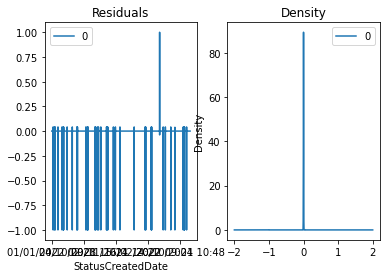

In [21]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(2,0,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [22]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)
# pred.index=dfs.index[start:end+1]



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


43005    0.999038
43006    0.998998
43007    0.998999
43008    0.998999
43009    0.998999
           ...   
61431    0.998999
61432    0.998999
61433    0.998999
61434    0.998999
61435    0.998999
Name: predicted_mean, Length: 18431, dtype: float64
StatusCreatedDate
01/01/2022 02:28    1
01/01/2022 04:25    1
01/01/2022 08:49    1
01/01/2022 09:27    1
01/01/2022 13:23    1
                   ..
22/01/2022 16:53    1
22/01/2022 17:02    1
22/01/2022 17:19    1
22/01/2022 17:19    1
22/01/2022 17:49    1
Name: GroupSize, Length: 43005, dtype: int64


In [23]:
print(pred)

43005    0.999038
43006    0.998998
43007    0.998999
43008    0.998999
43009    0.998999
           ...   
61431    0.998999
61432    0.998999
61433    0.998999
61434    0.998999
61435    0.998999
Name: predicted_mean, Length: 18431, dtype: float64


In [33]:
pred.index=dfs.index[start:end+1]

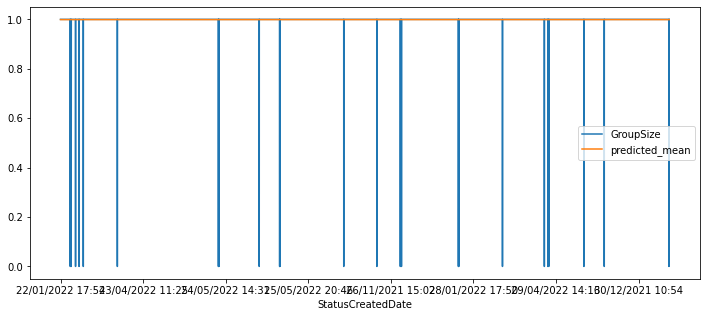

In [38]:
test.plot(legend=True, figsize=(12,5))
pred.plot(legend=True, figsize=(12,5))



In [25]:
# pd.concat([dfs['GroupSize'],pred], axis=1).plot()
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  0.0024626708807531945


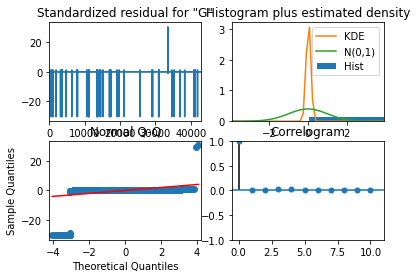

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()
# model_fit.plot_predict(dynamic=False)
plt.show()

In [46]:
dfPred = df2.set_index('StatusCreatedDate')
dfPred = dfPred.resample('w').sum()
dfPred
# df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], dayfirst=True)

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId,days_to_event,cum_booking
StatusCreatedDate,,,,,,,,,
2021-03-07,8,1,1,0.0,24077,0,219,161.939583,11110
2021-03-14,14,2,2,0.0,48148,0,438,88.843056,38018
2021-03-21,14,2,2,0.0,48148,0,438,429.786111,60359
2021-03-28,0,0,0,0.0,0,0,0,0.000000,0
2021-04-04,0,0,0,0.0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...
2022-06-19,5502,945,947,1130.0,24762078,2,207393,7989.601389,27972196
2022-06-26,5107,838,839,2565.0,21954042,1,183741,5038.075000,37686011
2022-07-03,4145,686,686,1320.0,17980886,0,150234,30980.154167,27416413


In [40]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61436 entries, 01/01/2022 02:28 to 31/12/2021 23:07
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          61436 non-null  object         
 1   StartDate          61436 non-null  object         
 2   EventType          61436 non-null  int64          
 3   BookingReference   61436 non-null  object         
 4   AttendeeReference  61436 non-null  object         
 5   GroupSize          61436 non-null  int64          
 6   IsLeadAttendee     61436 non-null  int64          
 7   AttendeeGrossCost  61436 non-null  float64        
 8   EventId            61436 non-null  int64          
 9   BookingStatus      61436 non-null  int64          
 10  AttendeeType       61436 non-null  object         
 11  TicketType         61436 non-null  object         
 12  ClientId           61436 non-null  int64          
 13  time_to_event      61436 

## checking for stationarity


In [47]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [48]:
# ADF Test on each column
for name, column in dfPred.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EventType" 
    -----------------------------------------------
ADF Statistic: -1.982027
p-value: 0.294509
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Non-stationary


    Augmented Dickey-Fuller Test on "GroupSize" 
    -----------------------------------------------
ADF Statistic: -3.417902
p-value: 0.010364
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Stationary


    Augmented Dickey-Fuller Test on "IsLeadAttendee" 
    -----------------------------------------------
ADF Statistic: -3.415568
p-value: 0.010439
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Stationary


    Augmented Dickey-Fuller Test on "AttendeeGrossCost" 
    -----------------------------------------------
ADF Statistic: -1.444167
p-value: 0.560928
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Non-stationary


    Augmented Dickey-Fuller Test on "EventId" 
    -----------------------------------------------
ADF Statistic: -3.417253
p-value: 0.

# weekly arima

In [49]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfPred['GroupSize'], test_size=.3, shuffle=False)

In [50]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfPred['GroupSize'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1134.899, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1138.329, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1136.921, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1135.614, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1136.329, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1134.149, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1134.991, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1132.151, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1134.149, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1138.649, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1130.384, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1133.616, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1134.921, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1132.384, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -562.192
Date:                Mon, 20 Feb 2023   AIC                           1130.384
Time:                        00:04:48   BIC                           1137.172
Sample:                    03-07-2021   HQIC                          1133.083
                         - 07-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5299      0.151      3.503      0.000       0.233       0.826
ma.L1         -0.8654      0.104     -8.318      0.000      -1.069      -0.661
sigma2      4.393e+05   4.23e+04     10.382      0.000    3.56e+05    5.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               144.13
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             852.22   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -391.233
Date:                Mon, 20 Feb 2023   AIC                            788.466
Time:                        00:05:14   BIC                            794.142
Sample:                    03-07-2021   HQIC                           790.619
                         - 02-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7191      0.364     -1.974      0.048      -1.433      -0.005
ma.L1          0.5532      0.378      1.462      0.144      -0.188       1.295
sigma2      5.038e+05   5.41e+04      9.307      0.0

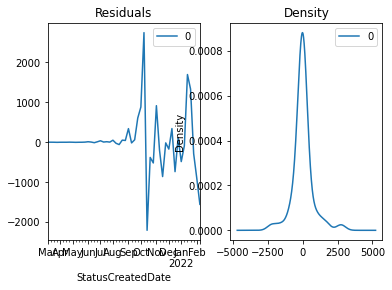

In [51]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(1,1,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [52]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)

2022-02-20    767.332861
2022-02-27    621.120596
2022-03-06    726.258676
2022-03-13    650.656155
2022-03-20    705.020294
2022-03-27    665.928216
2022-04-03    694.038484
2022-04-10    673.824998
2022-04-17    688.360079
2022-04-24    677.908217
2022-05-01    685.423925
2022-05-08    680.019541
2022-05-15    683.905717
2022-05-22    681.111252
2022-05-29    683.120691
2022-06-05    681.675747
2022-06-12    682.714775
2022-06-19    681.967632
2022-06-26    682.504887
2022-07-03    682.118559
2022-07-10    682.396359
2022-07-17    682.196599
Freq: W-SUN, Name: predicted_mean, dtype: float64
StatusCreatedDate
2021-03-07       1
2021-03-14       2
2021-03-21       2
2021-03-28       0
2021-04-04       0
2021-04-11       0
2021-04-18       0
2021-04-25       2
2021-05-02       2
2021-05-09       0
2021-05-16       0
2021-05-23       0
2021-05-30       3
2021-06-06      15
2021-06-13      18
2021-06-20       7
2021-06-27      20
2021-07-04      54
2021-07-11      55
2021-07-18      70
20

In [55]:
pred.index=dfPred.index[start:end+1]

In [56]:
print(pred)


StatusCreatedDate
2022-02-20    767.332861
2022-02-27    621.120596
2022-03-06    726.258676
2022-03-13    650.656155
2022-03-20    705.020294
2022-03-27    665.928216
2022-04-03    694.038484
2022-04-10    673.824998
2022-04-17    688.360079
2022-04-24    677.908217
2022-05-01    685.423925
2022-05-08    680.019541
2022-05-15    683.905717
2022-05-22    681.111252
2022-05-29    683.120691
2022-06-05    681.675747
2022-06-12    682.714775
2022-06-19    681.967632
2022-06-26    682.504887
2022-07-03    682.118559
2022-07-10    682.396359
2022-07-17    682.196599
Freq: W-SUN, Name: predicted_mean, dtype: float64


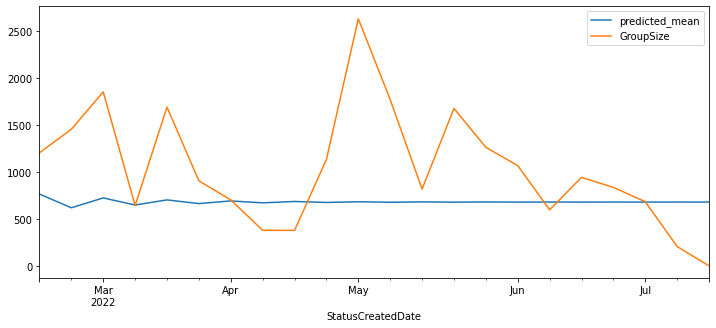

In [57]:
pred.plot(legend=True, figsize=(12,5))

test.plot(legend=True, figsize=(12,5))

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  522.7588031724063


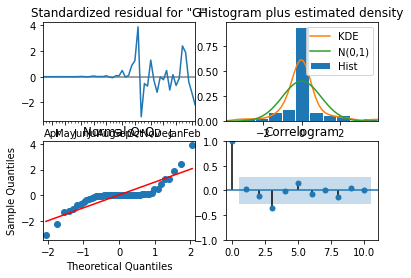

In [59]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()
# model_fit.plot_predict(dynamic=False)
plt.show()

In [65]:
def create_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['hour'] = dfs.index.hour
    dfs['dayofweek'] = dfs.index.dayofweek
    dfs['quarter'] = dfs.index.quarter
    dfs['month'] = dfs.index.month
    dfs['year'] = dfs.index.year
    dfs['dayofyear'] = dfs.index.dayofyear
    dfs['dayofmonth'] = dfs.index.day
    dfs['weekofyear'] = dfs.index.isocalendar().week
    return dfs

dfs = create_features(dfPred)

In [66]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs, test_size=.3, shuffle=False)

In [69]:
train = create_features(train)
test = create_features(test)

FEATURES = ['EventType','days_to_event','BookingStatus','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'GroupSize'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [72]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[00:14:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1280.51	validation_1-rmse:1194.28
[100]	validation_0-rmse:587.715	validation_1-rmse:491.271
[200]	validation_0-rmse:300.745	validation_1-rmse:244.4
[300]	validation_0-rmse:168.126	validation_1-rmse:153.574
[400]	validation_0-rmse:99.5104	validation_1-rmse:128.094
[500]	validation_0-rmse:60.9878	validation_1-rmse:120.118
[600]	validation_0-rmse:38.0637	validation_1-rmse:117.095
[700]	validation_0-rmse:24.3402	validation_1-rmse:115.144
[800]	validation_0-rmse:16.1914	validation_1-rmse:114.702
[900]	validation_0-rmse:11.7483	validation_1-rmse:114.245
[999]	validation_0-rmse:9.45396	validation_1-rmse:114.021


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

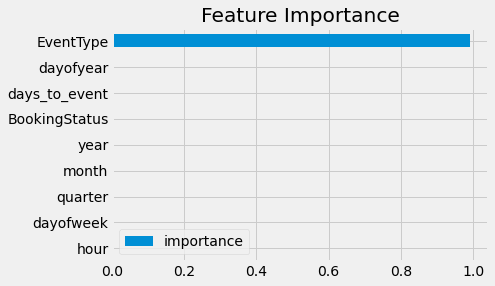

In [73]:
fi = pd.DataFrame(data=reg.feature_importances_, index= reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

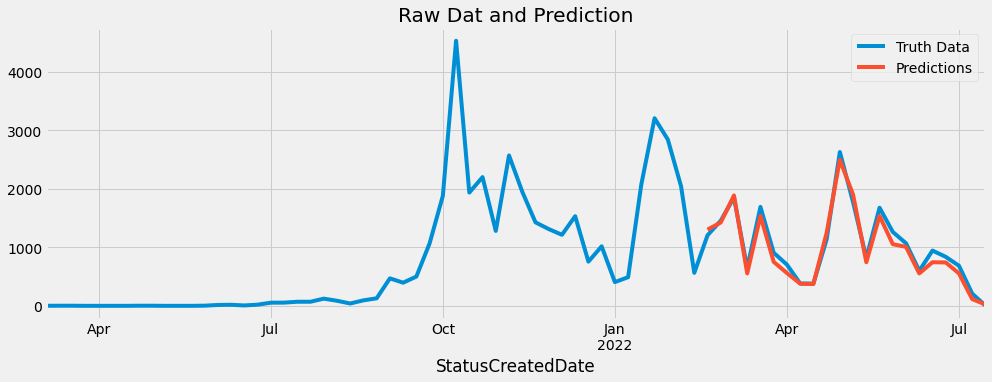

In [74]:
test['prediction'] = reg.predict(X_test)
dfs = dfs.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfs[['GroupSize']].plot(figsize=(15, 5))
test['prediction'].plot(legend=True)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [75]:
score = np.sqrt(mean_squared_error(test['GroupSize'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 114.02


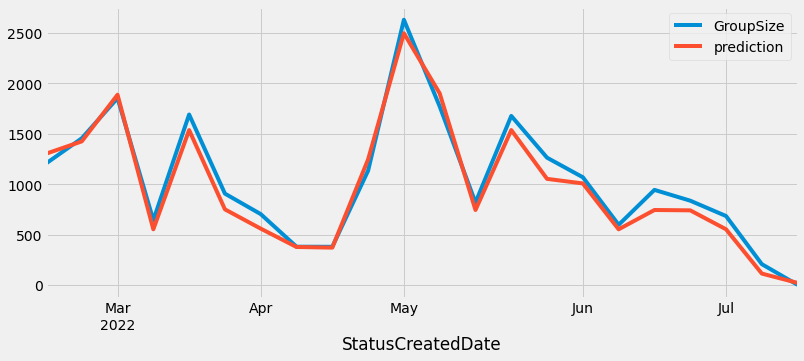

In [76]:
test['GroupSize'].plot(legend=True, figsize=(12,5))
test['prediction'].plot(legend=True, figsize=(12,5))
# style='.'
# test['GroupSize'].plot(legend=True, figsize=(12,5))

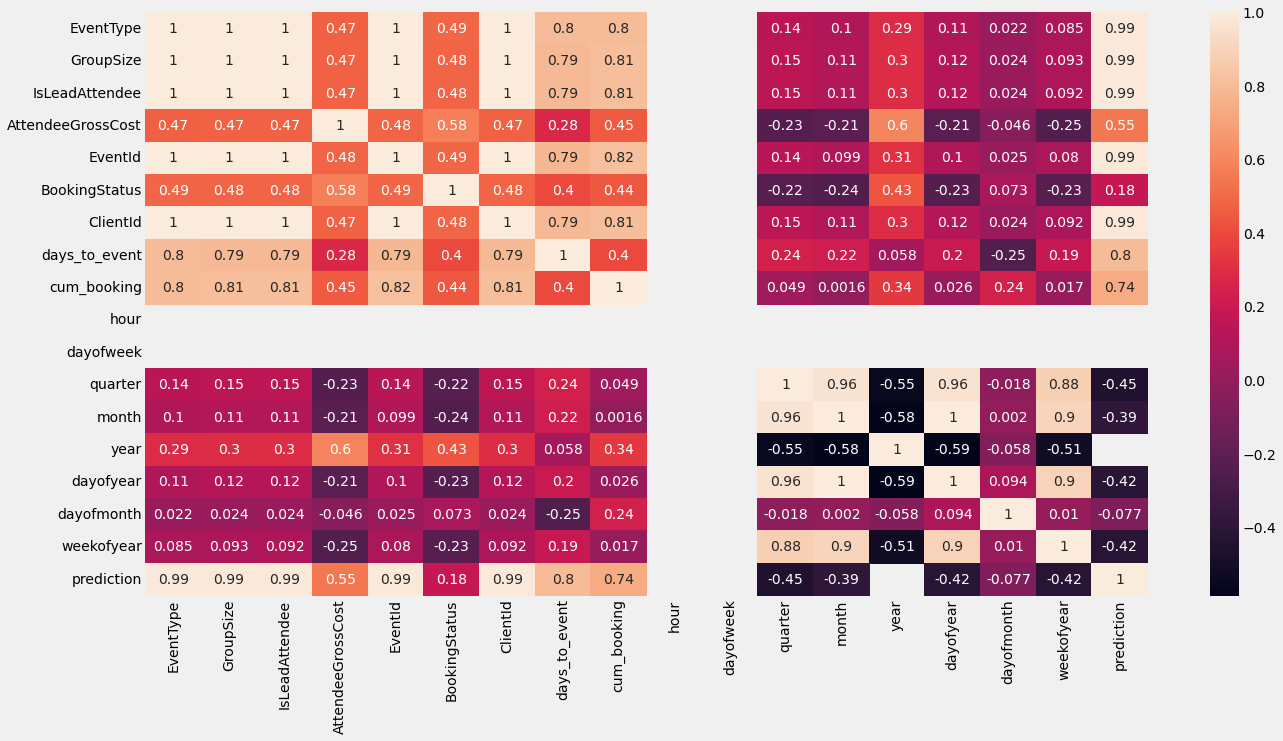

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(dfs.corr(), annot = True)